In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("currentData.csv")

In [2]:
data.head()

,index,timestamp,rec_round,avg_onset,spec_centroid,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,spec_spread,spec_flux,c1,c2,c3,c4,c5,c6,c7,c8
0,1,'2020/08/19 08:20:37:399',2,154.313004,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,25.528242,2,8,6,6,4,3,1,1
1,2,'2020/08/19 08:20:37:515',2,1466.093018,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,...,4423.216309,1.262220,2,8,6,6,4,3,1,1
2,3,'2020/08/19 08:20:37:519',2,1466.093018,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,...,4423.216309,1.262220,2,8,6,6,4,3,1,1
3,4,'2020/08/19 08:20:37:523',2,1466.093018,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,...,4423.216309,1.262220,2,8,6,6,4,3,1,1
4,5,'2020/08/19 08:20:37:528',2,1466.093018,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,...,4423.216309,1.262220,2,8,6,6,4,3,1,1


Remove attributes with no meaning. Remove first row for strange data. Avg_onset is removed because data is unreliable.

In [34]:
cleanData = data.drop(labels=["index","timestamp","rec_round","avg_onset"],axis=1)
cleanData = cleanData.drop(index=0,axis=0)

In [35]:
cleanData.head()

,spec_centroid,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,spec_spread,spec_flux,c1,c2,c3,c4,c5,c6,c7,c8
1,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,0.283703,0.283886,0.273554,0.226326,...,4423.216309,1.26222,2,8,6,6,4,3,1,1
2,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,0.283703,0.283886,0.273554,0.226326,...,4423.216309,1.26222,2,8,6,6,4,3,1,1
3,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,0.283703,0.283886,0.273554,0.226326,...,4423.216309,1.26222,2,8,6,6,4,3,1,1
4,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,0.283703,0.283886,0.273554,0.226326,...,4423.216309,1.26222,2,8,6,6,4,3,1,1
5,1923.234009,0.0,0.333913,0.443973,0.336422,0.335821,0.283703,0.283886,0.273554,0.226326,...,4423.216309,1.26222,2,8,6,6,4,3,1,1


In [14]:
cleanData.describe()

,avg_onset,spec_centroid,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,spec_spread,spec_flux,c1,c2,c3,c4,c5,c6,c7,c8
count,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,...,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000,38046.000000
mean,473.600055,1124.954349,0.682989,0.704066,0.256659,0.002333,-0.083870,-0.139338,-0.147694,-0.103782,...,1376.275498,79.390206,8.950849,6.327945,6.800715,7.319140,3.319613,5.109236,1.332597,1.712926
std,4647.900711,640.102152,0.465318,0.171049,0.324704,0.292590,0.252519,0.207902,0.189001,0.200283,...,835.594832,77.927920,4.047322,2.937950,2.330319,3.211504,1.157393,2.966169,0.871163,1.891404
min,0.000000,0.000000,0.000000,-0.481534,-0.695961,-0.721021,-0.760213,-0.700652,-0.651817,-0.631025,...,0.000000,0.873593,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.461000,743.235901,0.000000,0.649682,0.083308,-0.163536,-0.226118,-0.272121,-0.267401,-0.244907,...,902.820862,25.837875,5.000000,4.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000
50%,155.348999,921.729431,1.000000,0.751802,0.333178,0.012178,-0.094171,-0.160145,-0.168770,-0.125786,...,1053.280029,58.697487,9.000000,7.000000,7.000000,6.000000,4.000000,5.000000,1.000000,1.000000
75%,458.184998,1268.342896,1.000000,0.819115,0.499995,0.179820,0.045906,-0.039002,-0.056594,0.001411,...,1463.184814,106.759682,13.000000,9.000000,10.000000,10.000000,4.000000,7.000000,1.000000,1.000000
max,478167.062500,8823.097656,1.000000,0.952282,0.844068,0.738423,0.651669,0.561755,0.505620,0.586170,...,6613.458496,838.682007,13.000000,10.000000,10.000000,12.000000,4.000000,12.000000,5.000000,8.000000


In [30]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38046 entries, 1 to 38046
Data columns (total 57 columns):
avg_onset             38046 non-null float64
spec_centroid         38046 non-null float64
mfcc1                 38046 non-null float64
mfcc2                 38046 non-null float64
mfcc3                 38046 non-null float64
mfcc4                 38046 non-null float64
mfcc5                 38046 non-null float64
mfcc6                 38046 non-null float64
mfcc7                 38046 non-null float64
mfcc8                 38046 non-null float64
mfcc9                 38046 non-null float64
mfcc10                38046 non-null float64
mfcc11                38046 non-null float64
mfcc12                38046 non-null float64
mfcc13                38046 non-null float64
mfcc14                38046 non-null float64
mfcc15                38046 non-null float64
mfcc16                38046 non-null float64
mfcc17                38046 non-null float64
mfcc18                38046 non-null

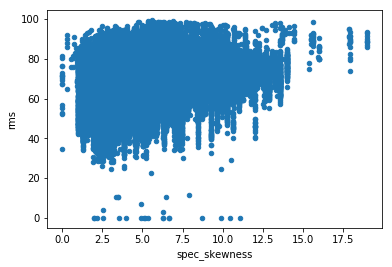

In [88]:
cleanData.plot(kind="scatter",x="spec_skewness",y="rms")

# Removing labels and scaling data

In [41]:
import numpy as np

In [222]:
data_arr = np.array(cleanData)
raw_data_arr = np.array(cleanData)

Scale mfcc 2 - 38 from -1 - 1 to 0 - 1

In [223]:
data_arr_mfcc_scaled = data_arr
data_arr_mfcc_scaled[:,2:39] = data_arr[:,2:39] * .5 + .5

In [224]:
data_arr_onset_scaled = data_arr_mfcc_scaled
data_arr_onset_scaled[:,39] = data_arr_mfcc_scaled[:,39] / 25

In [225]:
data_arr_rms_scaled = data_arr_onset_scaled
data_arr_rms_scaled[:,40] = data_arr_onset_scaled[:,40] * 0.01

In [226]:
data_arr_skew_scaled = data_arr_rms_scaled
data_arr_skew_scaled[:,41] = data_arr_rms_scaled[:,41] / 20

In [227]:
data_arr_br_scaled = data_arr_skew_scaled
data_arr_br_scaled[:,46] = data_arr_skew_scaled[:,46] / 8000

In [228]:
data_arr_flux_scaled = data_arr_br_scaled
data_arr_flux_scaled[:,47] = data_arr_br_scaled[:,47]/ 1000

In [229]:
data_arr_centroid_scaled = data_arr_flux_scaled
data_arr_centroid_scaled[:,0] = data_arr_centroid_scaled[:,0]/10000

In [230]:
dataset_scaled_nolabels = np.delete(data_arr_centroid_scaled, [48, 49, 50, 51, 52, 53, 54, 55],axis=1)

In [217]:
%store dataset_scaled_nolabels

Stored 'dataset_scaled_nolabels' (ndarray)


# Preparing labels
- 8 target labels

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [231]:
num_dirs = data_arr[:,48]
deposit_amt = data_arr[:,49]
max_speed = data_arr[:,50]
max_force = data_arr[:,51]
decay_rate = data_arr[:,52]
sense_dist = data_arr[:,53]
slope_size = data_arr[:,54]
displace_size = data_arr[:,55]

Last thing to do is to shuffle the data. 


In [169]:
from sklearn.utils import shuffle


In [232]:
dataset_scaled_nolabels, 
num_dirs,
deposit_amt,
max_speed, 
max_force,
decay_rate,
sense_dist,
slope_size, 
displace_size = shuffle(dataset_scaled_nolabels, 
num_dirs,
deposit_amt,
max_speed, 
max_force,
decay_rate,
sense_dist,
slope_size, 
displace_size)

In [233]:
%store num_dirs
%store deposit_amt
%store max_speed
%store max_force
%store decay_rate
%store sense_dist
%store slope_size
%store displace_size
%store dataset_scaled_nolabels

Stored 'num_dirs' (ndarray)
Stored 'deposit_amt' (ndarray)
Stored 'max_speed' (ndarray)
Stored 'max_force' (ndarray)
Stored 'decay_rate' (ndarray)
Stored 'sense_dist' (ndarray)
Stored 'slope_size' (ndarray)
Stored 'displace_size' (list)
Stored 'dataset_scaled_nolabels' (ndarray)


In [64]:
cleanData.to_csv("audio.csv", index = False)